In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_backtrack = pd.read_parquet("drive/MyDrive/data/sudoku/backtrack.pq")
df_human = pd.read_parquet("drive/MyDrive/data/sudoku/human.pq")
df_backtrack['solver'] = "backtrack"
df_human['solver'] = "human"
df_all = pd.concat([df_backtrack, df_human],axis=0)
df_all.head()

,game_level,game_id,solve_correct,solve_time,solver
0,2.0,7130.0,1.0,0.127757,backtrack
1,1.0,942.0,1.0,0.054718,backtrack
2,1.0,1687.0,1.0,0.015908,backtrack
3,4.0,5841.0,1.0,0.485701,backtrack
4,2.0,6776.0,1.0,0.031807,backtrack


In [4]:
df_human.shape

(1252, 5)

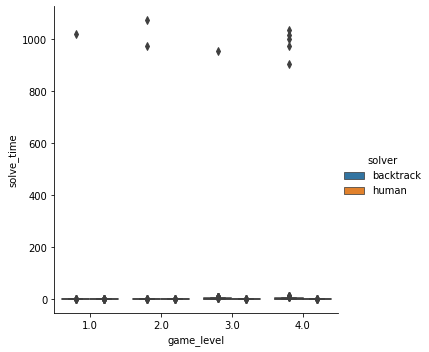

In [5]:
sns.catplot(data=df_all, kind="box",x="game_level",
            y="solve_time", hue="solver")

First of all, we can see that `Backtrack` solver have some crazy outliers (takes 1000 secods to solve even level 1 puzzle). Meanwhile, `Human` solver have none of those outliers. 

This is an indication that: `Human` solver avoid the worst case scenario that could happen to `Backtrack` (1).

Keep this in mind, we can safely remove those outliers out of the dataset!

In [6]:
df_all = df_all[df_all['solve_time'] < df_all['solve_time'].describe(percentiles=[0.99])['99%'] * 3]
df_all

,game_level,game_id,solve_correct,solve_time,solver
0,2.0,7130.0,1.0,0.127757,backtrack
1,1.0,942.0,1.0,0.054718,backtrack
2,1.0,1687.0,1.0,0.015908,backtrack
3,4.0,5841.0,1.0,0.485701,backtrack
4,2.0,6776.0,1.0,0.031807,backtrack
...,...,...,...,...,...
1247,2.0,8768.0,1.0,0.075646,human
1248,3.0,2927.0,1.0,0.097086,human
1249,1.0,718.0,1.0,0.068855,human
1250,3.0,4896.0,1.0,0.091712,human


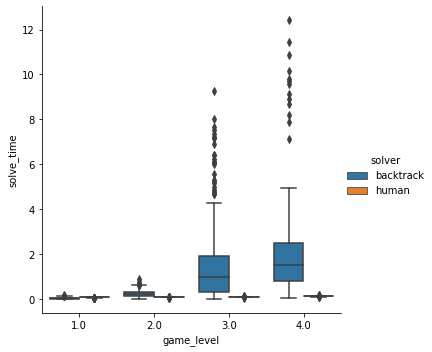

In [7]:
sns.catplot(data=df_all, kind="box",x="game_level",
            y="solve_time", hue="solver")

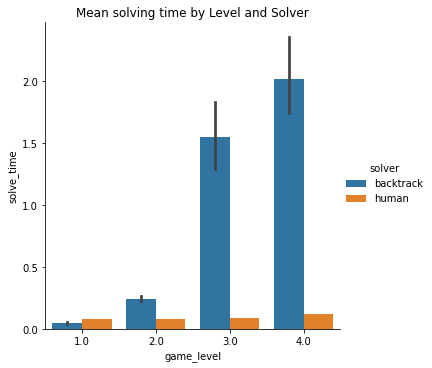

In [8]:
sns.catplot(data=df_all, kind="bar",x="game_level",
            y="solve_time", hue="solver", ci=99, legend_out=True)
plt.title("Mean solving time by Level and Solver")
plt.show()

In [9]:
# np.median(df_all['solve_time'])

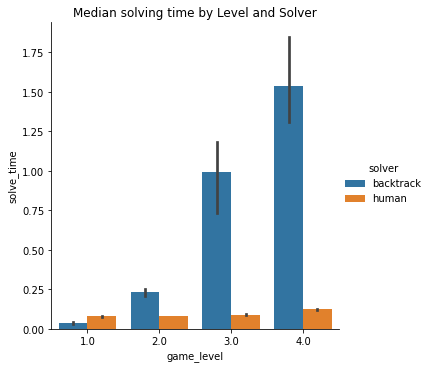

In [10]:
sns.catplot(data=df_all, kind="bar",x="game_level",
            y="solve_time", estimator=np.median, hue="solver",
            # errorbar=("ci", 0.99)
            ci= 99,
            )
plt.title("Median solving time by Level and Solver")
plt.show()

For games with difficulty level 1, Human solver takes more time to solve compare to the Backtrack solver. This is probably due to signicant upfront cost of Human solver. However, for level 2 and above, Human solver takes not more time to solve while Backtrack solver takes much more time to solve with high level of variations.

=> Human solver has some upfront cost, but consistently solve more difficult puzzle without spending much more time. Meanwhile, Backtrack solver performance depends a lot on the puzzle difficulty.